[심박 기본 가정](https://www.forbes.com/health/wellness/normal-heart-rate-by-age/)  
[미국 심장 협회](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)  
[블로그](https://dpreviewplus.tistory.com/entry/%EC%A0%95%EC%83%81-%EC%8B%AC%EB%B0%95%EC%88%98%EC%99%80-%EC%9A%B4%EB%8F%99%ED%95%A0%EB%95%8C-%EC%A0%81%EB%8B%B9%ED%95%9C-%EB%AA%A9%ED%91%9C%EC%8B%AC%EB%B0%95%EC%88%98-%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0)  
[연령대별 심박](https://www.whoop.com/us/en/thelocker/whats-a-normal-heart-rate-for-my-age/)  
[연령대별 심박2](https://www.healthline.com/health/dangerous-heart-rate#for-children)

In [4]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.font_manager as fm
# fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/gulim.ttc' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

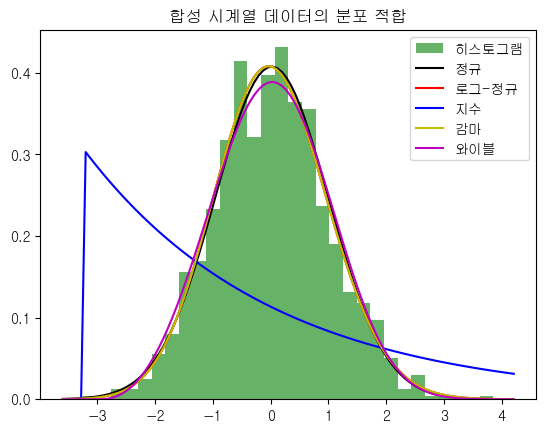

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, weibull_min, poisson
import seaborn as sns

# 합성 시계열 데이터 생성
np.random.seed(42)
data = np.random.randn(1000)  # 실제 시계열 데이터로 교체

# 데이터의 히스토그램 플롯
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(data)
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(data)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(data)
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
params_gamma = gamma.fit(data)
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

# 와이블 분포
params_weibull = weibull_min.fit(data)
pdf_weibull = weibull_min.pdf(x, *params_weibull)
plt.plot(x, pdf_weibull, 'm-', label='와이블')

plt.title('합성 시계열 데이터의 분포 적합')
plt.legend()
plt.show()

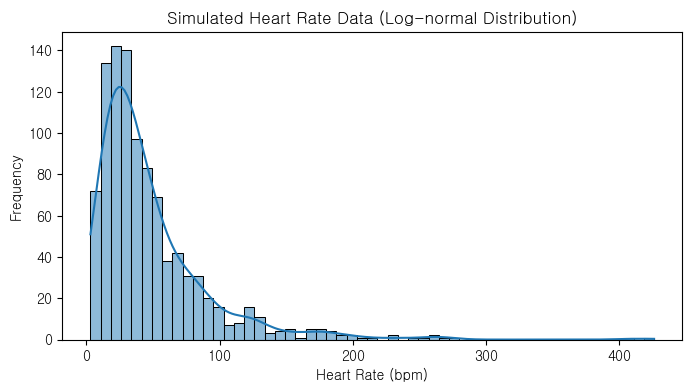

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm

mean, sigma = 3.5, 0.8  # 예시 매개변수
sample_size = 1000
simulated_heart_rates = lognorm(s=sigma, scale=np.exp(mean)).rvs(sample_size)

plt.figure(figsize=(8, 4))
sns.histplot(simulated_heart_rates, kde=True)
plt.title('Simulated Heart Rate Data (Log-normal Distribution)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()


In [10]:
import pandas as pd
tj = pd.read_csv('../data/heart_rate_tj.csv')

norm: KS Statistic = 1.0000, p-value = 0.0000
lognorm: KS Statistic = 1.0000, p-value = 0.0000
expon: KS Statistic = 1.0000, p-value = 0.0000
gamma: KS Statistic = 1.0000, p-value = 0.0000
weibull_min: KS Statistic = 0.0861, p-value = 0.0000


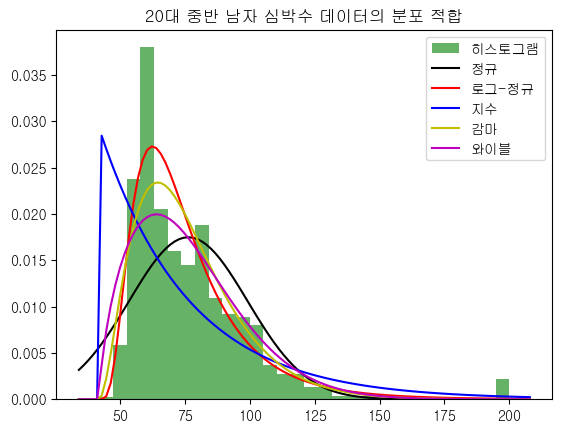

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, weibull_min, poisson
import seaborn as sns
from scipy.stats import kstest

# Define the missing variable
params_weibull_min = weibull_min.fit(tj['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma', 'weibull_min']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(tj['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(tj['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(tj['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(tj['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(tj['heart_rate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
params_gamma = gamma.fit(tj['heart_rate'])
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

# 와이블 분포
params_weibull = weibull_min.fit(tj['heart_rate'])
pdf_weibull = weibull_min.pdf(x, *params_weibull)
plt.plot(x, pdf_weibull, 'm-', label='와이블')

plt.title('20대 중반 남자 심박수 데이터의 분포 적합')
plt.legend()
plt.show()

In [12]:
kaggle_data = pd.read_csv('../data/dementia_patients_health_data.csv')

norm: KS Statistic = 0.2379, p-value = 0.0000
lognorm: KS Statistic = 0.2182, p-value = 0.0000
expon: KS Statistic = 0.4086, p-value = 0.0000
gamma: KS Statistic = 0.2166, p-value = 0.0000
weibull_min: KS Statistic = 0.0911, p-value = 0.0000


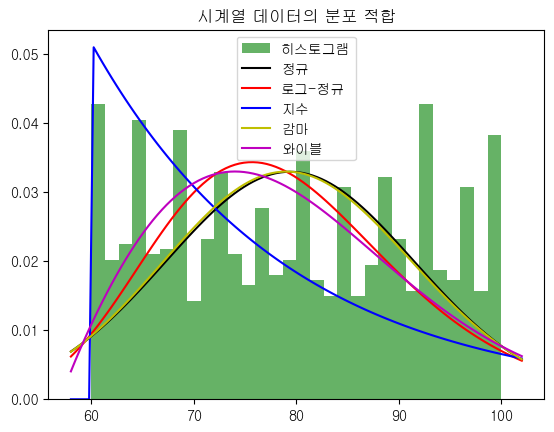

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, weibull_min, poisson
import seaborn as sns
from scipy.stats import kstest

# Define the missing variable
params_weibull_min = weibull_min.fit(kaggle_data['HeartRate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma', 'weibull_min']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(kaggle_data['HeartRate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(kaggle_data['HeartRate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(kaggle_data['HeartRate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(kaggle_data['HeartRate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(kaggle_data['HeartRate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
params_gamma = gamma.fit(kaggle_data['HeartRate'])
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

# 와이블 분포
params_weibull = weibull_min.fit(kaggle_data['HeartRate'])
pdf_weibull = weibull_min.pdf(x, *params_weibull)
plt.plot(x, pdf_weibull, 'm-', label='와이블')

plt.title('시계열 데이터의 분포 적합')
plt.legend()
plt.show()

In [14]:
dy = pd.read_csv('../data/heart_rate_dy.csv', encoding='cp949')

norm: KS Statistic = 0.2048, p-value = 0.0000
lognorm: KS Statistic = 0.2428, p-value = 0.0000
expon: KS Statistic = 0.3826, p-value = 0.0000
gamma: KS Statistic = 0.2204, p-value = 0.0000
weibull_min: KS Statistic = 0.0955, p-value = 0.0000


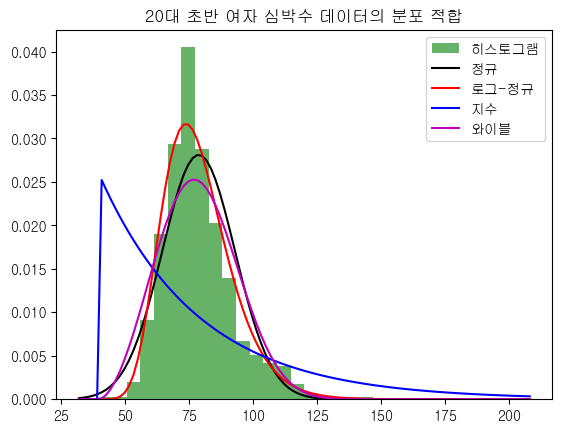

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, weibull_min, poisson
import seaborn as sns
from scipy.stats import kstest

# Define the missing variable
params_weibull_min = weibull_min.fit(dy['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma', 'weibull_min']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(dy['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(dy['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(dy['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(dy['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(dy['heart_rate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# # 감마 분포
# params_gamma = gamma.fit(dy['heart_rate'])
# pdf_gamma = gamma.pdf(x, *params_gamma)
# plt.plot(x, pdf_gamma, 'y-', label='감마')

# 와이블 분포
params_weibull = weibull_min.fit(dy['heart_rate'])
pdf_weibull = weibull_min.pdf(x, *params_weibull)
plt.plot(x, pdf_weibull, 'm-', label='와이블')

plt.title('20대 초반 여자 심박수 데이터의 분포 적합')
plt.legend()
plt.show()

In [16]:
ay = pd.read_csv('../data/heart_rate_ay.csv', encoding='cp949')

norm: KS Statistic = 0.1000, p-value = 0.0000
lognorm: KS Statistic = 0.0493, p-value = 0.0000
expon: KS Statistic = 0.3721, p-value = 0.0000
gamma: KS Statistic = 0.1138, p-value = 0.0000
weibull_min: KS Statistic = 0.0955, p-value = 0.0000


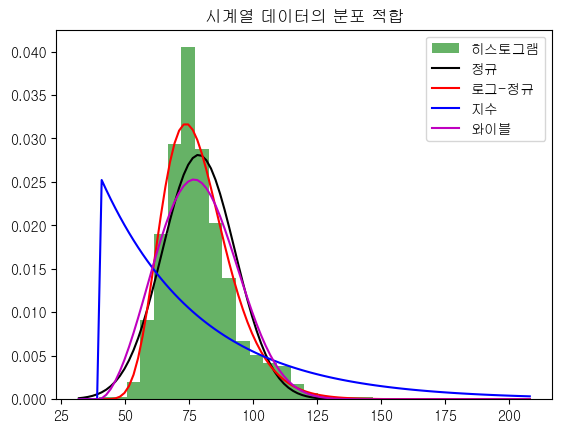

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, weibull_min, poisson
import seaborn as sns
from scipy.stats import kstest

# Define the missing variable
params_weibull_min = weibull_min.fit(ay['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma', 'weibull_min']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(ay['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(ay['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(ay['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(ay['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(ay['heart_rate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# # 감마 분포
# params_gamma = gamma.fit(ay['heart_rate'])
# pdf_gamma = gamma.pdf(x, *params_gamma)
# plt.plot(x, pdf_gamma, 'y-', label='감마')

# 와이블 분포
params_weibull = weibull_min.fit(ay['heart_rate'])
pdf_weibull = weibull_min.pdf(x, *params_weibull)
plt.plot(x, pdf_weibull, 'm-', label='와이블')

plt.title('시계열 데이터의 분포 적합')
plt.legend()
plt.show()

      Simulated Data
0          71.865748
1          67.851003
2          56.847474
3          95.878951
4          56.044743
...              ...
2385       64.599995
2386       61.042711
2387       53.975057
2388       73.430955
2389       82.773713

[2390 rows x 1 columns]


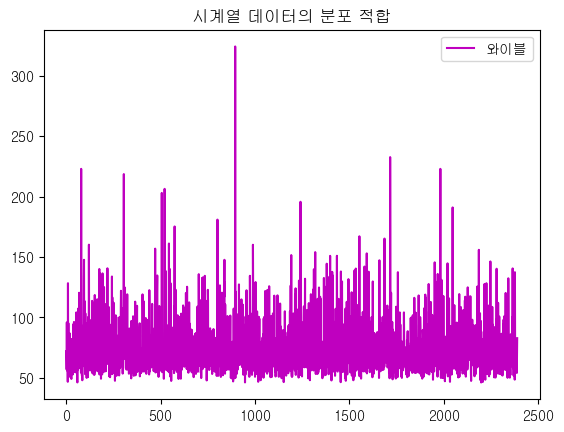

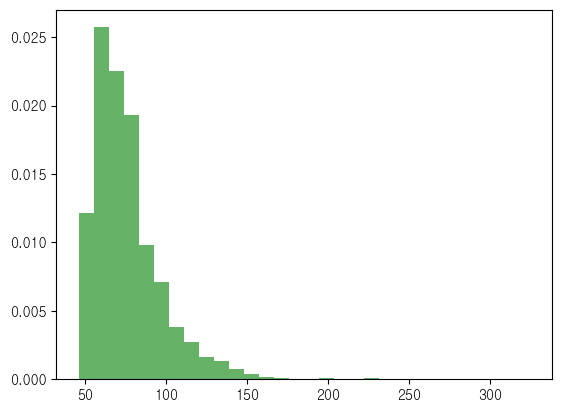

In [18]:
import numpy as np
from scipy.stats import lognorm
import pandas as pd
# Extract parameters for log-normal distribution from tj dataset
params_lognorm = lognorm.fit(tj['heart_rate'])

# Generate simulated data based on log-normal distribution
sample_size = len(tj['heart_rate'])
simulated_data = lognorm(*params_lognorm).rvs(sample_size)

# Add 5% anomaly data to the simulated dataset
anomaly_percentage = 0.05
num_anomalies = int(sample_size * anomaly_percentage)
anomalies = np.random.choice(simulated_data, size=num_anomalies)
simulated_data[:num_anomalies] = anomalies


# Create a DataFrame with the same index and data length
simulated_df = pd.DataFrame(simulated_data, index=tj.index[:sample_size], columns=['Simulated Data'])

# Print the simulated dataset
print(simulated_df)

plt.plot(simulated_data, 'm-', label='와이블')

plt.title('시계열 데이터의 분포 적합')
plt.legend()
plt.show()


start_date = '2024-01-01'
end_date = '2024-01-31'
index = pd.date_range(start=start_date, end=end_date, freq='1min')

plt.hist(simulated_data, bins=30, density=True, alpha=0.6, color='g', label='히스토그램')
plt.show()

In [19]:
len(index)

43201

In [20]:
simulated_df['Simulated Data'].describe()

count    2390.000000
mean       75.850566
std        22.242513
min        46.086373
25%        60.752336
50%        70.709694
75%        84.382162
max       324.312833
Name: Simulated Data, dtype: float64

In [21]:
import os
os.getcwd()

'c:\\Users\\jun99\\OneDrive - 계명대학교\\바탕 화면\\stat\\졸업논문\\분석\\code'

In [22]:
mk = pd.read_csv('../data/MK_heartrate.csv', encoding='cp949')
mk.head()

,source,tag_id,heart_beat_count,start_time,custom,binning_data,update_time,create_time,max,min,time_offset,deviceuuid,comment,pkg_name,end_time,datauuid,heart_rate
0,NaN,21312,1,2021-04-16 10:00,NaN,NaN,2021-04-16 10:00,2021-04-16 10:00,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-16 10:00,bb8c951a-eda2-43b5-2158-c30a7877d7e1,88
1,NaN,21312,1,2021-04-16 15:40,NaN,NaN,2021-04-16 15:40,2021-04-16 15:01,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-16 15:40,d4a89f2f-22fb-e87c-71e3-8a7921d9aaeb,86
2,NaN,21312,1,2021-04-16 21:50,NaN,NaN,2021-04-16 21:55,2021-04-16 21:55,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-16 21:50,83a797cd-cee2-cf07-04e3-0503605d8a1f,71
3,NaN,21312,1,2021-04-17 2:30,NaN,NaN,2021-04-17 2:31,2021-04-17 2:22,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-17 2:30,db842272-8440-0047-ba31-0bc5a0423664,79
4,NaN,21312,1,2021-04-17 7:10,NaN,NaN,2021-04-17 7:15,2021-04-17 7:03,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-17 7:10,edbe4c26-33fa-696d-0e0a-6c661ac2c9ba,113


norm: KS Statistic = 0.2456, p-value = 0.0000
lognorm: KS Statistic = 0.2630, p-value = 0.0000
expon: KS Statistic = 0.2528, p-value = 0.0000
gamma: KS Statistic = 0.0767, p-value = 0.0000
weibull_min: KS Statistic = 0.3235, p-value = 0.0000


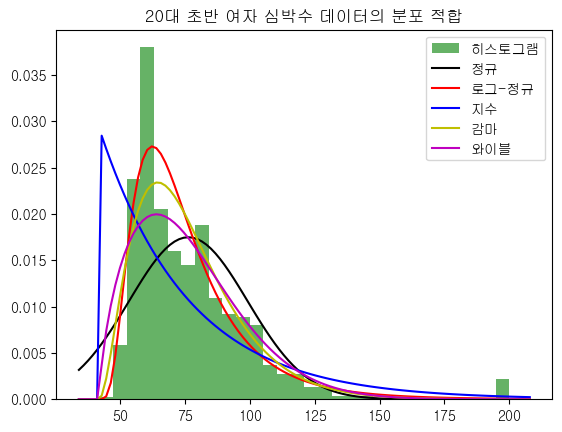

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, weibull_min, poisson
import seaborn as sns
from scipy.stats import kstest

# Define the missing variable
params_weibull_min = weibull_min.fit(mk['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma', 'weibull_min']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(tj['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(tj['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(tj['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(tj['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(tj['heart_rate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
params_gamma = gamma.fit(tj['heart_rate'])
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

# 와이블 분포
params_weibull = weibull_min.fit(tj['heart_rate'])
pdf_weibull = weibull_min.pdf(x, *params_weibull)
plt.plot(x, pdf_weibull, 'm-', label='와이블')

plt.title('20대 초반 여자 심박수 데이터의 분포 적합')
plt.legend()
plt.show()

In [24]:
import numpy as np
from scipy.stats import lognorm

# Extract parameters for log-normal distribution from tj dataset
params_lognorm = lognorm.fit(tj['heart_rate'])

# Generate simulated data based on log-normal distribution
sample_size = len(tj['heart_rate'])
simulated_data = lognorm(*params_lognorm).rvs(sample_size)

# Print the simulated dataset
print(simulated_data)


[60.9681549  74.38832356 49.53537311 ... 63.33935508 58.23725048
 60.06509893]
